# 선형회귀 (자동차 연비 예측)
---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
#!gdown https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv
To: /content/auto-mpg.csv
18.1kB [00:00, 24.0MB/s]       


In [27]:
mpg = pd.read_csv("/content/auto-mpg.csv", na_values=['?'])
mpg.shape

(398, 9)

In [28]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [33]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [32]:
mpg = mpg.dropna()
#mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].median())

In [34]:
X = mpg.drop(['mpg', 'car name', 'origin'], axis=1)
y = mpg['mpg']

## 테스트 셋 분리

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2022)
X_train.shape, X_test.shape

((313, 6), (79, 6))

## 정규화

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

## 모델

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)), # 속성의 개수만큼 들어옴 (X len)
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse','mae']
)

## 학습

In [45]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2, # :: 검증용 데이터
                    verbose=1) 

Epoch 1/200
8/8 [==============================] - 1s 28ms/step - loss: 575.5351 - mse: 575.5351 - mae: 22.7274 - val_loss: 637.3383 - val_mse: 637.3383 - val_mae: 24.0339
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 555.8508 - mse: 555.8508 - mae: 22.3180 - val_loss: 616.3557 - val_mse: 616.3557 - val_mae: 23.6281
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 537.2943 - mse: 537.2943 - mae: 21.9165 - val_loss: 594.6674 - val_mse: 594.6674 - val_mae: 23.2015
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 517.0229 - mse: 517.0229 - mae: 21.4693 - val_loss: 570.8378 - val_mse: 570.8378 - val_mae: 22.7191
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 493.1440 - mse: 493.1440 - mae: 20.9308 - val_loss: 541.7011 - val_mse: 541.7011 - val_mae: 22.1203
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 465.1866 - mse: 465.1866 - mae: 20.2829 - val_loss: 506.9302 - val_mse: 5

## 성능 확인

In [46]:
model.evaluate(X_train, y_train)

10/10 [==============================] - 0s 3ms/step - loss: 7.1800 - mse: 7.1800 - mae: 1.9153


[7.179973125457764, 7.179973125457764, 1.9153344631195068]

In [49]:
# 로그 확인
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [56]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.plot(hist['epoch'], hist['mse'], label="Train MSE")
  plt.plot(hist['epoch'], hist['val_mse'], label="Val MSE")
  plt.legend()
  plt.show()

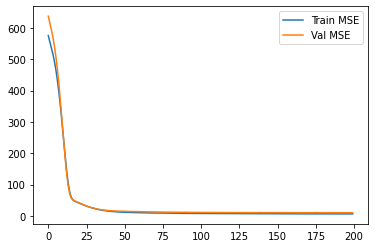

In [58]:
plot_history(history)

## 예측

In [61]:
y_pred = model.predict(X_test)
y_pred.shape

3/3 [==============================] - 0s 5ms/step


(79, 1)

In [62]:
y_test.shape

(79,)

In [64]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(79,)

In [66]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

7.250988008646979

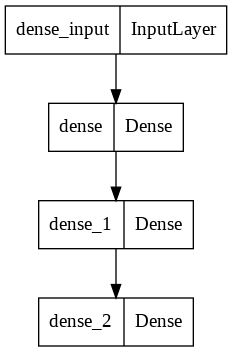

In [68]:
tf.keras.utils.plot_model(model)